# Bundesliga_data - eine Spielerei

Ziel ist es über die API der OpenligaDB (siehe https://www.openligadb.de/) die Statistiken der einzelnen Spieltage zu ziehen. Zudem werden mit etwas Web-Scraping die Zuschauerdaten von der Webseite des Kickers gezogen:


In [1]:
import requests
import pandas as pd
import numpy as np

# um die Daten des 1. Spieltags zu ziehen ruft man diese Adresse auf:
url = "https://api.openligadb.de/getmatchdata/bl1/2020/1"
bundesliga = requests.get(url)

print(bundesliga.headers)

{'Transfer-Encoding': 'chunked', 'Content-Type': 'application/json; charset=utf-8', 'Server': 'Microsoft-IIS/10.0', 'Strict-Transport-Security': 'max-age=2592000', 'X-Powered-By': 'ASP.NET', 'Date': 'Mon, 21 Aug 2023 15:17:38 GMT'}


Der Contente-Type ist json.

Wir wollen die Daten aller Spieltage der Bundesliga Saison 2022/23 aus dem Internet ziehen:

In [2]:
# Spieltagsliste:
spieltage = [x for x in range(1,35)]
print(spieltage)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]


Jetzt können wir die aufzurufenden Urls bauen:

In [3]:
urls = list()
for tag in spieltage: 
    url = "https://api.openligadb.de/getmatchdata/bl1/2022/" + str(tag)
    urls.append(url)
print(urls)

['https://api.openligadb.de/getmatchdata/bl1/2022/1', 'https://api.openligadb.de/getmatchdata/bl1/2022/2', 'https://api.openligadb.de/getmatchdata/bl1/2022/3', 'https://api.openligadb.de/getmatchdata/bl1/2022/4', 'https://api.openligadb.de/getmatchdata/bl1/2022/5', 'https://api.openligadb.de/getmatchdata/bl1/2022/6', 'https://api.openligadb.de/getmatchdata/bl1/2022/7', 'https://api.openligadb.de/getmatchdata/bl1/2022/8', 'https://api.openligadb.de/getmatchdata/bl1/2022/9', 'https://api.openligadb.de/getmatchdata/bl1/2022/10', 'https://api.openligadb.de/getmatchdata/bl1/2022/11', 'https://api.openligadb.de/getmatchdata/bl1/2022/12', 'https://api.openligadb.de/getmatchdata/bl1/2022/13', 'https://api.openligadb.de/getmatchdata/bl1/2022/14', 'https://api.openligadb.de/getmatchdata/bl1/2022/15', 'https://api.openligadb.de/getmatchdata/bl1/2022/16', 'https://api.openligadb.de/getmatchdata/bl1/2022/17', 'https://api.openligadb.de/getmatchdata/bl1/2022/18', 'https://api.openligadb.de/getmatchd

Als nächstes holen wir uns die jsons für alle Spieltage:

In [4]:
jsons = list()
for url in urls:
    jsons.append(requests.get(url).json())

In [5]:
print(jsons[0])

[{'matchID': 63864, 'matchDateTime': '2022-08-05T20:30:00', 'timeZoneID': 'W. Europe Standard Time', 'leagueId': 4562, 'leagueName': '1. Fußball-Bundesliga 2022/2023', 'leagueSeason': 2022, 'leagueShortcut': 'bl1', 'matchDateTimeUTC': '2022-08-05T18:30:00Z', 'group': {'groupName': '1. Spieltag', 'groupOrderID': 1, 'groupID': 39881}, 'team1': {'teamId': 91, 'teamName': 'Eintracht Frankfurt', 'shortName': 'Frankfurt', 'teamIconUrl': 'https://i.imgur.com/X8NFkOb.png', 'teamGroupName': None}, 'team2': {'teamId': 40, 'teamName': 'FC Bayern München', 'shortName': 'Bayern', 'teamIconUrl': 'https://i.imgur.com/jJEsJrj.png', 'teamGroupName': None}, 'lastUpdateDateTime': '2022-08-14T09:42:12.96', 'matchIsFinished': True, 'matchResults': [{'resultID': 98425, 'resultName': 'Endergebnis', 'pointsTeam1': 1, 'pointsTeam2': 6, 'resultOrderID': 1, 'resultTypeID': 2, 'resultDescription': 'Ergebnis nach Ende der offiziellen Spielzeit'}, {'resultID': 98426, 'resultName': 'Halbzeit', 'pointsTeam1': 0, 'poi

Jetzt bauen wir für jeden Spieltag einen Datensatz und speichern ihn in der Liste spieltage_dfs:

In [6]:
spieltage_dfs = list()

for json in jsons:
    spieltage_dfs.append(pd.DataFrame.from_dict(json))
spieltage_dfs[0]

,matchID,matchDateTime,timeZoneID,leagueId,leagueName,leagueSeason,leagueShortcut,matchDateTimeUTC,group,team1,team2,lastUpdateDateTime,matchIsFinished,matchResults,goals,location,numberOfViewers
0,63864,2022-08-05T20:30:00,W. Europe Standard Time,4562,1. Fußball-Bundesliga 2022/2023,2022,bl1,2022-08-05T18:30:00Z,"{'groupName': '1. Spieltag', 'groupOrderID': 1...","{'teamId': 91, 'teamName': 'Eintracht Frankfur...","{'teamId': 40, 'teamName': 'FC Bayern München'...",2022-08-14T09:42:12.96,True,"[{'resultID': 98425, 'resultName': 'Endergebni...","[{'goalID': 95049, 'scoreTeam1': 0, 'scoreTeam...","{'locationID': 30, 'locationCity': 'Frankfurt'...",None
1,63865,2022-08-06T15:30:00,W. Europe Standard Time,4562,1. Fußball-Bundesliga 2022/2023,2022,bl1,2022-08-06T13:30:00Z,"{'groupName': '1. Spieltag', 'groupOrderID': 1...","{'teamId': 95, 'teamName': 'FC Augsburg', 'sho...","{'teamId': 112, 'teamName': 'SC Freiburg', 'sh...",2023-03-12T12:25:38.537,True,"[{'resultID': 98437, 'resultName': 'Endergebni...","[{'goalID': 95079, 'scoreTeam1': 0, 'scoreTeam...","{'locationID': 1029, 'locationCity': 'Augsburg...",None
2,63866,2022-08-06T15:30:00,W. Europe Standard Time,4562,1. Fußball-Bundesliga 2022/2023,2022,bl1,2022-08-06T13:30:00Z,"{'groupName': '1. Spieltag', 'groupOrderID': 1...","{'teamId': 129, 'teamName': 'VfL Bochum', 'sho...","{'teamId': 81, 'teamName': '1. FSV Mainz 05', ...",2022-08-06T17:30:14.553,True,"[{'resultID': 98445, 'resultName': 'Endergebni...","[{'goalID': 95072, 'scoreTeam1': 1, 'scoreTeam...",None,None
3,63868,2022-08-06T15:30:00,W. Europe Standard Time,4562,1. Fußball-Bundesliga 2022/2023,2022,bl1,2022-08-06T13:30:00Z,"{'groupName': '1. Spieltag', 'groupOrderID': 1...","{'teamId': 87, 'teamName': 'Borussia Mönchengl...","{'teamId': 175, 'teamName': 'TSG 1899 Hoffenhe...",2022-08-06T17:23:32.847,True,"[{'resultID': 98439, 'resultName': 'Endergebni...","[{'goalID': 95073, 'scoreTeam1': 1, 'scoreTeam...",None,None
4,63871,2022-08-06T15:30:00,W. Europe Standard Time,4562,1. Fußball-Bundesliga 2022/2023,2022,bl1,2022-08-06T13:30:00Z,"{'groupName': '1. Spieltag', 'groupOrderID': 1...","{'teamId': 80, 'teamName': '1. FC Union Berlin...","{'teamId': 54, 'teamName': 'Hertha BSC', 'shor...",2023-03-12T12:24:55.59,True,"[{'resultID': 98441, 'resultName': 'Endergebni...","[{'goalID': 95084, 'scoreTeam1': 3, 'scoreTeam...","{'locationID': 82, 'locationCity': 'Berlin', '...",None
5,63872,2022-08-06T15:30:00,W. Europe Standard Time,4562,1. Fußball-Bundesliga 2022/2023,2022,bl1,2022-08-06T13:30:00Z,"{'groupName': '1. Spieltag', 'groupOrderID': 1...","{'teamId': 131, 'teamName': 'VfL Wolfsburg', '...","{'teamId': 134, 'teamName': 'Werder Bremen', '...",2022-08-06T17:25:48.177,True,"[{'resultID': 98443, 'resultName': 'Endergebni...","[{'goalID': 95066, 'scoreTeam1': 1, 'scoreTeam...",None,None
6,63867,2022-08-06T18:30:00,W. Europe Standard Time,4562,1. Fußball-Bundesliga 2022/2023,2022,bl1,2022-08-06T16:30:00Z,"{'groupName': '1. Spieltag', 'groupOrderID': 1...","{'teamId': 7, 'teamName': 'Borussia Dortmund',...","{'teamId': 6, 'teamName': 'Bayer Leverkusen', ...",2022-08-06T20:27:25.107,True,"[{'resultID': 98447, 'resultName': 'Endergebni...","[{'goalID': 95086, 'scoreTeam1': 1, 'scoreTeam...",None,None
7,63870,2022-08-07T15:30:00,W. Europe Standard Time,4562,1. Fußball-Bundesliga 2022/2023,2022,bl1,2022-08-07T13:30:00Z,"{'groupName': '1. Spieltag', 'groupOrderID': 1...","{'teamId': 16, 'teamName': 'VfB Stuttgart', 's...","{'teamId': 1635, 'teamName': 'RB Leipzig', 'sh...",2022-08-07T17:34:41.223,True,"[{'resultID': 98457, 'resultName': 'Endergebni...","[{'goalID': 95098, 'scoreTeam1': 1, 'scoreTeam...",None,None
8,63869,2022-08-07T17:30:00,W. Europe Standard Time,4562,1. Fußball-Bundesliga 2022/2023,2022,bl1,2022-08-07T15:30:00Z,"{'groupName': '1. Spieltag', 'groupOrderID': 1...","{'teamId': 65, 'teamName': '1. FC Köln', 'shor...","{'teamId': 9, 'teamName': 'FC Schalke 04', 'sh...",2022-08-07T20:34:59.85,True,"[{'resultID': 984

Die Team-Spalten sind nested:

In [7]:
spieltage_dfs[0]["team1"].iloc[0]
print(spieltage_dfs[0]["team1"].iloc[0]["teamName"])


Eintracht Frankfurt


In [8]:
# unnest team1 and team 2:
heim_gast_dict = {"team1" : "heim", "team2" : "gast"}
for spieltag in spieltage_dfs:
    for k, v in heim_gast_dict.items():
        spieltag[v] = np.nan
        for index, row in spieltag.iterrows():
            spieltag[v].iloc[index] = spieltag[k].iloc[index]["teamName"]
spieltage_dfs[0][["team1","heim", "team2","gast"]].head()



C:\Anaconda\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,team1,heim,team2,gast
0,"{'teamId': 91, 'teamName': 'Eintracht Frankfur...",Eintracht Frankfurt,"{'teamId': 40, 'teamName': 'FC Bayern München'...",FC Bayern München
1,"{'teamId': 95, 'teamName': 'FC Augsburg', 'sho...",FC Augsburg,"{'teamId': 112, 'teamName': 'SC Freiburg', 'sh...",SC Freiburg
2,"{'teamId': 129, 'teamName': 'VfL Bochum', 'sho...",VfL Bochum,"{'teamId': 81, 'teamName': '1. FSV Mainz 05', ...",1. FSV Mainz 05
3,"{'teamId': 87, 'teamName': 'Borussia Mönchengl...",Borussia Mönchengladbach,"{'teamId': 175, 'teamName': 'TSG 1899 Hoffenhe...",TSG 1899 Hoffenheim
4,"{'teamId': 80, 'teamName': '1. FC Union Berlin...",1. FC Union Berlin,"{'teamId': 54, 'teamName': 'Hertha BSC', 'shor...",Hertha BSC


In [9]:
# Das Selbe für matchResults
spieltage_dfs[0]["matchResults"].head()
print(spieltage_dfs[0]["matchResults"].iloc[0][0])

{'resultID': 98425, 'resultName': 'Endergebnis', 'pointsTeam1': 1, 'pointsTeam2': 6, 'resultOrderID': 1, 'resultTypeID': 2, 'resultDescription': 'Ergebnis nach Ende der offiziellen Spielzeit'}


Die Einträge in matchResults sind jeweils zwei dicts, wobei das erste das Endergebnis beinhaltet.
Wir wollen die erspielten Punkt für Heim- und Auswärtsteam an die Dataframes anhängen:
Zunächst fügen wir Spalten für die Tore der Heim- und Gastmannschaft hinzu:

In [10]:
endstand_dict = {"Tore Heim" : 'pointsTeam1', "Tore Gast" : 'pointsTeam2'} 
for spieltag in spieltage_dfs:
    for k, v in endstand_dict.items():
        spieltag[k] = np.nan
        for index, row in spieltag.iterrows():
            spieltag[k].iloc[index] = spieltag["matchResults"].iloc[index][0][v]
        spieltag[k] = spieltag[k].astype("int32")
spieltage_dfs[0].head

C:\Anaconda\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


<bound method NDFrame.head of    matchID        matchDateTime               timeZoneID  leagueId  \
0    63864  2022-08-05T20:30:00  W. Europe Standard Time      4562   
1    63865  2022-08-06T15:30:00  W. Europe Standard Time      4562   
2    63866  2022-08-06T15:30:00  W. Europe Standard Time      4562   
3    63868  2022-08-06T15:30:00  W. Europe Standard Time      4562   
4    63871  2022-08-06T15:30:00  W. Europe Standard Time      4562   
5    63872  2022-08-06T15:30:00  W. Europe Standard Time      4562   
6    63867  2022-08-06T18:30:00  W. Europe Standard Time      4562   
7    63870  2022-08-07T15:30:00  W. Europe Standard Time      4562   
8    63869  2022-08-07T17:30:00  W. Europe Standard Time      4562   

                        leagueName  leagueSeason leagueShortcut  \
0  1. Fußball-Bundesliga 2022/2023          2022            bl1   
1  1. Fußball-Bundesliga 2022/2023          2022            bl1   
2  1. Fußball-Bundesliga 2022/2023          2022            bl1   
3

Auf Basis des Endstands können wir jetzt die Punkte der beiden Gegner eintragen

In [11]:
for spieltag in spieltage_dfs:
    spieltag["Punkte Heim"] = np.where(spieltag["Tore Heim"] > spieltag["Tore Gast"], 3, np.where(spieltag["Tore Heim"] < spieltag["Tore Gast"],0,1))
    spieltag["Punkte Gast"] = np.where(spieltag["Tore Heim"] > spieltag["Tore Gast"], 0, np.where(spieltag["Tore Heim"] < spieltag["Tore Gast"],3,1))
    
spieltage_dfs[0].loc[:, "heim":]

,heim,gast,Tore Heim,Tore Gast,Punkte Heim,Punkte Gast
0,Eintracht Frankfurt,FC Bayern München,1,6,0,3
1,FC Augsburg,SC Freiburg,0,4,0,3
2,VfL Bochum,1. FSV Mainz 05,1,2,0,3
3,Borussia Mönchengladbach,TSG 1899 Hoffenheim,3,1,3,0
4,1. FC Union Berlin,Hertha BSC,3,1,3,0
5,VfL Wolfsburg,Werder Bremen,2,2,1,1
6,Borussia Dortmund,Bayer Leverkusen,1,0,3,0
7,VfB Stuttgart,RB Leipzig,1,1,1,1
8,1. FC Köln,FC Schalke 04,3,1,3,0


Als nächstes wollen wir die Zuschauerzahlen der Spiele hinzufügen. Diese kann man über die Seite des Kickers einlesen: Wie zu vor fügt man die Spieltagsnummer hinten in den Link hinzu:

In [12]:
from bs4 import BeautifulSoup
kicker_urls = list()
for tag in spieltage:
    url = "https://www.kicker.de/bundesliga/zuschauer-spieltag/2022-23/" + str(tag)
    kicker_urls.append(url)
    
print(kicker_urls)

['https://www.kicker.de/bundesliga/zuschauer-spieltag/2022-23/1', 'https://www.kicker.de/bundesliga/zuschauer-spieltag/2022-23/2', 'https://www.kicker.de/bundesliga/zuschauer-spieltag/2022-23/3', 'https://www.kicker.de/bundesliga/zuschauer-spieltag/2022-23/4', 'https://www.kicker.de/bundesliga/zuschauer-spieltag/2022-23/5', 'https://www.kicker.de/bundesliga/zuschauer-spieltag/2022-23/6', 'https://www.kicker.de/bundesliga/zuschauer-spieltag/2022-23/7', 'https://www.kicker.de/bundesliga/zuschauer-spieltag/2022-23/8', 'https://www.kicker.de/bundesliga/zuschauer-spieltag/2022-23/9', 'https://www.kicker.de/bundesliga/zuschauer-spieltag/2022-23/10', 'https://www.kicker.de/bundesliga/zuschauer-spieltag/2022-23/11', 'https://www.kicker.de/bundesliga/zuschauer-spieltag/2022-23/12', 'https://www.kicker.de/bundesliga/zuschauer-spieltag/2022-23/13', 'https://www.kicker.de/bundesliga/zuschauer-spieltag/2022-23/14', 'https://www.kicker.de/bundesliga/zuschauer-spieltag/2022-23/15', 'https://www.kicke

Wir legen eine Liste mit dem Inhalt der Webseiten an:

In [13]:
zuschauer_soups = list()
for url in kicker_urls:
    zuschauer_soups.append(BeautifulSoup(requests.get(url).text))

In [14]:
print(zuschauer_soups[0].find("table"))


<table class="kick__table kick__table--ranking kick__table--alternate kick__table--resptabelle">
<tbody>
<tr>
<th class="kick__t__a__l kick__respt-m-o-1 kick__respt-m-w-230"><a class="kick__table-sort" data-sort-column="paarung" data-sort-order="asc" data-sort-target="spectatorsContent" href="#">Paarung</a></th>
<th class="kick__t__a__l kick__respt-m-o-3 kick__respt-m-w-180"><a class="kick__table-sort" data-sort-column="stadion" data-sort-order="asc" data-sort-target="spectatorsContent" href="#">Stadion</a></th>
<th class="kick__table--ranking__master kick__respt-m-o-2 kick__respt-m-w-90 kick__respt-m-flexstart"><a class="kick__table-sort" data-sort-column="zuschauer" data-sort-order="asc" data-sort-target="spectatorsContent" href="#">Zuschauer<span class="kick__table-sort__pointer kick__icon-DropDown kick__table-sort__pointer--selected"></span></a></th>
</tr>
<tr>
<td class="kick__respt-m-o-1 kick__respt-m-w-230">
<div class="kick__v100-gameCell kick__v100-gameCell--standard">
<a clas

Es scheint jeweils mehrere Tabellen auf einer Seite zu geben. Wir machen für jede Seite fest welche der Tabellen auf der Siete, die mit den Spieltagszuschauern sind.

In [15]:
tabellen_nr = list()
for soup in zuschauer_soups:
    for k, table in enumerate(zuschauer_soups[0].find_all("table")):
        for i in table.find_all("th"):
            if "Paarung" in i.text:
                tabellen_nr.append(k)
                break
            else:
                continue
            break
print(np.unique(np.array((tabellen_nr))))

[0]


Jetzt wollen wir eine Liste von DataFrames mit den Zuschauern für jeden Spieltag erstellen:

In [16]:
def zuschauer_extrahieren(soup):
    liste = list()
    zuschauer_liste = list()
    orte = list()
    zuschauerzahlen = list()
    for row in soup.find_all("table")[0].find_all("tr"):
        for col in row.find_all("td"):
            liste.append(col.text.replace("\n", ""))
    for num  in range(0,len(liste),3):
        zuschauer_liste.append(liste[num: num + 3])
    for spiel_nr in range(0,9):
        orte.append(zuschauer_liste[spiel_nr][0].split(" ",1)[0])
        zuschauerzahlen.append(zuschauer_liste[spiel_nr][2].split(" ",1)[0])
    return orte, zuschauerzahlen 

orte, zahlen = zuschauer_extrahieren(zuschauer_soups[0])
print(orte, zahlen)

['Dortmund', 'Frankfurt', 'Köln', 'Gladbach', 'Stuttgart', 'Wolfsburg', 'Augsburg', 'Bochum', 'Union'] ['81.365', '51.500', '50.000', '49.659', '46.000', '28.015', '26.310', '24.110', '22.012']


Mit dieser Funktion können wir nun für jeden Spieltag die Zuschauerzahlen extrahieren und für jeden Spieltag in DataFrames speichern (es bietet sich an Gladbach in Mönchengladdbach umzubenennen):

In [17]:
zuschauer_spieltage_dfs = list()
for soup in zuschauer_soups:
    orte, zuschauerzahlen = zuschauer_extrahieren(soup)
    zuschauer_spieltage_dfs.append(pd.DataFrame(zip(orte, zuschauerzahlen), columns = ["Ort", "Zuschauerzahl"]))

for df in zuschauer_spieltage_dfs:
    df["Ort"][df["Ort"] == "Gladbach"] = "Mönchengladbach"
print(zuschauer_spieltage_dfs[0])


               Ort Zuschauerzahl
0         Dortmund        81.365
1        Frankfurt        51.500
2             Köln        50.000
3  Mönchengladbach        49.659
4        Stuttgart        46.000
5        Wolfsburg        28.015
6         Augsburg        26.310
7           Bochum        24.110
8            Union        22.012


Jetzt können wir die Zuschauerzahlen an die jeweiligen Spieltagsdatensätze anfügen:

In [18]:
spieltag1 = spieltage_dfs[0]
orte_liste = list()

for index in range(0,4):
    #print(index)
    for val in zuschauer_spieltage_dfs[index]["Ort"].values:
        orte_liste.append(val)
orte_set = set(orte_liste)

print(len(orte_set)) # um sicherzugehe, dass man alle erwischt hat, muss 18 sein

clubs_set = set(spieltag1["heim"].values).union(set(spieltag1["gast"]))
name_ort_dict = {}
for club in clubs_set:
    for ort in orte_set:
        if ort in club:
            name_ort_dict[ort] = club

# füge die Clubnamen in den Zuschauerdatensätzen als key hinzu, um später joinen zu können
df["heim"] = np.nan
for df in zuschauer_spieltage_dfs:
    for ort in df["Ort"].values:
        df.loc[df["Ort"] == ort, "heim"] = name_ort_dict[ort]

zuschauer_spieltage_dfs[0].head()

18


,Ort,Zuschauerzahl,heim
0,Dortmund,81.365,Borussia Dortmund
1,Frankfurt,51.500,Eintracht Frankfurt
2,Köln,50.000,1. FC Köln
3,Mönchengladbach,49.659,Borussia Mönchengladbach
4,Stuttgart,46.000,VfB Stuttgart


Jetzt können wir die jeweiligen Zuschauer-Datensätze und Spieltag-Datensätze joinen:

In [23]:
for tag in range(0,34):
    spieltage_dfs[tag] = spieltage_dfs[tag].join(zuschauer_spieltage_dfs[tag].set_index('heim'), on='heim')

In [24]:
spieltage_dfs[0].loc[:, "heim":]

,heim,gast,Tore Heim,Tore Gast,Punkte Heim,Punkte Gast,Ort,Zuschauerzahl
0,Eintracht Frankfurt,FC Bayern München,1,6,0,3,Frankfurt,51.500
1,FC Augsburg,SC Freiburg,0,4,0,3,Augsburg,26.310
2,VfL Bochum,1. FSV Mainz 05,1,2,0,3,Bochum,24.110
3,Borussia Mönchengladbach,TSG 1899 Hoffenheim,3,1,3,0,Mönchengladbach,49.659
4,1. FC Union Berlin,Hertha BSC,3,1,3,0,Union,22.012
5,VfL Wolfsburg,Werder Bremen,2,2,1,1,Wolfsburg,28.015
6,Borussia Dortmund,Bayer Leverkusen,1,0,3,0,Dortmund,81.365
7,VfB Stuttgart,RB Leipzig,1,1,1,1,Stuttgart,46.000
8,1. FC Köln,FC Schalke 04,3,1,3,0,Köln,50.000


Wir bauen einen Datensatz mit allen Begegnungen:


In [315]:
begegnungen_2022_23 = pd.concat(spieltage_dfs, ignore_index = True)
#begegnungen_2022_23.head()
begegnungen_2022_23.tail()

,matchID,matchDateTime,timeZoneID,leagueId,leagueName,leagueSeason,leagueShortcut,matchDateTimeUTC,group,team1,...,location,numberOfViewers,heim,gast,Tore Heim,Tore Gast,Punkte Heim,Punkte Gast,Ort,Zuschauerzahl
301,64166,2023-05-27T15:30:00,W. Europe Standard Time,4562,1. Fußball-Bundesliga 2022/2023,2022,bl1,2023-05-27T13:30:00Z,"{'groupName': '34. Spieltag', 'groupOrderID': ...","{'teamId': 65, 'teamName': '1. FC Köln', 'shor...",...,None,None,1. FC Köln,FC Bayern München,1,2,0,3,Köln,50.000
302,64167,2023-05-27T15:30:00,W. Europe Standard Time,4562,1. Fußball-Bundesliga 2022/2023,2022,bl1,2023-05-27T13:30:00Z,"{'groupName': '34. Spieltag', 'groupOrderID': ...","{'teamId': 1635, 'teamName': 'RB Leipzig', 'sh...",...,None,None,RB Leipzig,FC Schalke 04,4,2,3,0,Leipzig,47.069
303,64168,2023-05-27T15:30:00,W. Europe Standard Time,4562,1. Fußball-Bundesliga 2022/2023,2022,bl1,2023-05-27T13:30:00Z,"{'groupName': '34. Spieltag', 'groupOrderID': ...","{'teamId': 16, 'teamName': 'VfB Stuttgart', 's...",...,None,None,VfB Stuttgart,TSG 1899 Hoffenheim,1,1,1,1,Stuttgart,47.500
304,64169,2023-05-27T15:30:00,W. Europe Standard Time,4562,1. Fußball-Bundesliga 2022/2023,2022,bl1,2023-05-27T13:30:00Z,"{'groupName': '34. Spieltag', 'groupOrderID': ...","{'teamId': 80, 'teamName': '1. FC Union Berlin...",...,None,None,1. FC Union Berlin,Werder Bremen,1,0,3,0,Union,22.012
305,64170,2023-05-27T15:30:00,W. Europe Standard Time,4562,1. Fußball-Bundesliga 2022/2023,2022,bl1,2023-05-27T13:30:00Z,"{'groupName': '34. Spieltag', 'groupOrderID': ...","{'teamId': 131, 'teamName': 'VfL Wolfsburg', '...",...,None,None,VfL Wolfsburg,Hertha BSC,1,2,0,3,Wolfsburg,26.775


Die Funktion func_punte schreibt für jeden Club seine Punkte des Spieltags in ein dict:

In [45]:
punktzahlen = pd.DataFrame(columns = clubs_set)




def func_punkte(spieltag):
    punkte = dict()
    for club in clubs_set: 
        if club in spieltag["heim"].values:
            punkte[club] = spieltag[spieltag["heim"] == club]["Punkte Heim"].values[0]
        elif club in spieltag["gast"].values:
            punkte[club] = spieltag[spieltag["gast"] == club]["Punkte Gast"].values[0]
    return punkte


Diese Funktion schreibt Punkte, Tore und Gegentore zu einem bestimmten Spieltag in ein dict, wobei die einzelnen Club die Keys sind:

In [59]:
def func_stats(spieltag):
    stats = dict()
    for club in clubs_set: 
        if club in spieltag["heim"].values:
            stats[club] = { "Punkte": spieltag[spieltag["heim"] == club]["Punkte Heim"].values[0],
                           "Tore": spieltag[spieltag["heim"] == club]["Tore Heim"].values[0],
                           "Gegentore" : spieltag[spieltag["heim"] == club]["Tore Gast"].values[0]}
        elif club in spieltag["gast"].values:
            stats[club] = { "Punkte": spieltag[spieltag["gast"] == club]["Punkte Gast"].values[0],
                           "Tore": spieltag[spieltag["gast"] == club]["Tore Gast"].values[0],
                           "Gegentore" : spieltag[spieltag["gast"] == club]["Tore Heim"].values[0]}
    return stats


In [60]:
punktzahlen = list()
stats = list()
for df in spieltage_dfs:
    punktzahlen.append(func_punkte(df))
    stats.append(func_stats(df))

In [62]:
print(stats[0])

{'FC Bayern München': {'Punkte': 3, 'Tore': 6, 'Gegentore': 1}, 'RB Leipzig': {'Punkte': 1, 'Tore': 1, 'Gegentore': 1}, 'TSG 1899 Hoffenheim': {'Punkte': 0, 'Tore': 1, 'Gegentore': 3}, 'SC Freiburg': {'Punkte': 3, 'Tore': 4, 'Gegentore': 0}, 'FC Augsburg': {'Punkte': 0, 'Tore': 0, 'Gegentore': 4}, 'Werder Bremen': {'Punkte': 1, 'Tore': 2, 'Gegentore': 2}, 'Eintracht Frankfurt': {'Punkte': 0, 'Tore': 1, 'Gegentore': 6}, 'VfB Stuttgart': {'Punkte': 1, 'Tore': 1, 'Gegentore': 1}, '1. FSV Mainz 05': {'Punkte': 3, 'Tore': 2, 'Gegentore': 1}, 'Bayer Leverkusen': {'Punkte': 0, 'Tore': 0, 'Gegentore': 1}, 'Borussia Mönchengladbach': {'Punkte': 3, 'Tore': 3, 'Gegentore': 1}, 'VfL Wolfsburg': {'Punkte': 1, 'Tore': 2, 'Gegentore': 2}, '1. FC Köln': {'Punkte': 3, 'Tore': 3, 'Gegentore': 1}, 'Borussia Dortmund': {'Punkte': 3, 'Tore': 1, 'Gegentore': 0}, '1. FC Union Berlin': {'Punkte': 3, 'Tore': 3, 'Gegentore': 1}, 'FC Schalke 04': {'Punkte': 0, 'Tore': 1, 'Gegentore': 3}, 'Hertha BSC': {'Punkte':

Wir bauen jetzt für jeden Club ein DataFrame mit Punkten und Punkten gesamt, Toren und Gegentoren (jeweils auch gesamt). Diese Dataframes sammeln wir wieder in einem dict

In [267]:
club_stats_dfs = {}
for club in clubs_set:
    df = pd.DataFrame(columns = ["Spieltag", "Punkte Spieltag", "Tore Spieltag", "Gegentore Spieltag", "Punkte gesamt", 
                                 "Tore gesamt", "Gegentore gesamt"])
    gesamtpunkte = 0
    gesamttore = 0
    gesamtgegentore = 0
    for i in range(0,34):
        spiel = i+1
        punkte_spieltag = stats[i][club]["Punkte"]
        tore_spieltag = stats[i][club]["Tore"]
        gegentore_spieltag = stats[i][club]["Gegentore"]
        gesamtpunkte = gesamtpunkte + punkte_spieltag
        gesamttore = gesamttore + tore_spieltag
        gesamtgegentore = gesamtgegentore + gegentore_spieltag
        
        df = df.append(pd.Series([spiel, punkte_spieltag, tore_spieltag, gegentore_spieltag, 
                                     gesamtpunkte, gesamttore, gesamtgegentore], index = df.columns), ignore_index = True)
    club_stats_dfs[club] = df

In [268]:
club_stats_dfs["FC Bayern München"]

,Spieltag,Punkte Spieltag,Tore Spieltag,Gegentore Spieltag,Punkte gesamt,Tore gesamt,Gegentore gesamt
0,1,3,6,1,3,6,1
1,2,3,2,0,6,8,1
2,3,3,7,0,9,15,1
3,4,1,1,1,10,16,2
4,5,1,1,1,11,17,3
5,6,1,2,2,12,19,5
6,7,0,0,1,12,19,6
7,8,3,4,0,15,23,6
8,9,1,2,2,16,25,8
9,10,3,5,0,19,30,8


Es lohnt sich noch die Tordfifferenz zu ergänzen:

In [299]:
for club in clubs_set:
    club_stats_dfs[club]["Tordifferenz"] =  club_stats_dfs[club]["Tore gesamt"]-club_stats_dfs[club]["Gegentore gesamt"]
    

In [300]:
club_stats_dfs["FC Bayern München"].head()

,Spieltag,Punkte Spieltag,Tore Spieltag,Gegentore Spieltag,Punkte gesamt,Tore gesamt,Gegentore gesamt,Tordifferenz
0,1,3,6,1,3,6,1,5
1,2,3,2,0,6,8,1,7
2,3,3,7,0,9,15,1,14
3,4,1,1,1,10,16,2,14
4,5,1,1,1,11,17,3,14


Wir bauen eine Funktion mit der man die Tabelle zu einem vorgegebenem Spieltag ausgeben kann

In [301]:
def print_tabelle(spieltag):
    cols = ["Club", "Punkte gesamt", "Tore gesamt", "Gegentore gesamt", "Tordifferenz"]
    tabelle = pd.DataFrame(columns= cols)
    # extrahiere für jeden Club die stats zum Stand des Spieltags  
    for pos, club in enumerate(clubs_set):
        #tabelle.iloc[pos] = club_stats_dfs[club].loc[club_stats_dfs[club]["Spieltag"]==spieltag]
        stats = club_stats_dfs[club].loc[club_stats_dfs[club]["Spieltag"]==spieltag]
        stats.insert(loc=0, column= "Club", value = club)
        #stats.insert(loc=0, column= "Tordifferenz", value = stats["Tore gesamt"]-stats["Gegentore gesamt"])
        tabelle = pd.concat([tabelle, stats], ignore_index = True)
    tabelle.sort_values(by = ["Punkte gesamt", "Tordifferenz"], ascending= False, inplace = True)
   
    tabelle.reset_index(inplace = True, drop = True)
    tabelle["Position"] = tabelle.index + 1
    tabelle.set_index("Position", inplace = True)
    cols  = ["Club", "Spieltag", "Punkte gesamt", "Tore gesamt", "Gegentore gesamt", "Tordifferenz"]
    tabelle = tabelle.reindex(columns = cols)
    

    display(tabelle)


Ein Test:  

Es bietet sich an die Tabellen-Datensätze zu speichern:

In [302]:
print_tabelle(34)

,Club,Spieltag,Punkte gesamt,Tore gesamt,Gegentore gesamt,Tordifferenz
Position,,,,,,
1,FC Bayern München,34,71,92,38,54
2,Borussia Dortmund,34,71,83,44,39
3,RB Leipzig,34,66,64,41,23
4,1. FC Union Berlin,34,62,51,38,13
5,SC Freiburg,34,59,51,44,7
6,Bayer Leverkusen,34,50,57,49,8
7,Eintracht Frankfurt,34,50,58,52,6
8,VfL Wolfsburg,34,49,57,48,9
9,1. FSV Mainz 05,34,46,54,55,-1


In [305]:
def return_tabelle_df(spieltag):
    cols = ["Club", "Punkte gesamt", "Tore gesamt", "Gegentore gesamt", "Tordifferenz"]
    tabelle = pd.DataFrame(columns= cols)
    # extrahiere für jeden Club die stats zum Stand des Spieltags  
    for pos, club in enumerate(clubs_set):
        #tabelle.iloc[pos] = club_stats_dfs[club].loc[club_stats_dfs[club]["Spieltag"]==spieltag]
        stats = club_stats_dfs[club].loc[club_stats_dfs[club]["Spieltag"]==spieltag]
        stats.insert(loc=0, column= "Club", value = club)
        #stats.insert(loc=0, column= "Tordifferenz", value = stats["Tore gesamt"]-stats["Gegentore gesamt"])
        tabelle = pd.concat([tabelle, stats], ignore_index = True)
    tabelle.sort_values(by = ["Punkte gesamt", "Tordifferenz"])
    tabelle.reset_index(inplace = True, drop = True)
    tabelle["Position"] = tabelle.index + 1
    tabelle.set_index("Position", inplace = True)
    cols  = ["Club", "Spieltag", "Punkte gesamt", "Tore gesamt", "Gegentore gesamt", "Tordifferenz"]
    tabelle = tabelle.reindex(columns = cols)
    return tabelle

Wir speichern die Tabellen in einem dict:

In [306]:
tabellen_dict = {}
for spieltag in range(1,35):
    tabellen_dict[spieltag] = return_tabelle_df(spieltag)

In [307]:
tabellen_dict[34]

,Club,Spieltag,Punkte gesamt,Tore gesamt,Gegentore gesamt,Tordifferenz
Position,,,,,,
1,FC Bayern München,34,71,92,38,54
2,RB Leipzig,34,66,64,41,23
3,TSG 1899 Hoffenheim,34,36,48,57,-9
4,SC Freiburg,34,59,51,44,7
5,FC Augsburg,34,34,42,63,-21
6,Werder Bremen,34,36,51,64,-13
7,Eintracht Frankfurt,34,50,58,52,6
8,VfB Stuttgart,34,33,45,57,-12
9,1. FSV Mainz 05,34,46,54,55,-1


Um interaktive Plots zu erstellen, nutzen wir plotly.express

In [308]:
import plotly.express as px

# zu Erinnerung
club_stats_dfs["FC Bayern München"].head()

,Spieltag,Punkte Spieltag,Tore Spieltag,Gegentore Spieltag,Punkte gesamt,Tore gesamt,Gegentore gesamt,Tordifferenz
0,1,3,6,1,3,6,1,5
1,2,3,2,0,6,8,1,7
2,3,3,7,0,9,15,1,14
3,4,1,1,1,10,16,2,14
4,5,1,1,1,11,17,3,14


Die Funktion Punkte_plotten kann für eine Liste von Clubs deren Punkte im Laufe der Saison plotten

In [309]:
def Punkte_plotten(clubs):
    clubs_dfs = list()
    for i,club in enumerate(clubs):
        clubs_dfs.append(club_stats_dfs[clubs[i]])
        clubs_dfs[i]["Club"] = club
    df = pd.concat(clubs_dfs)
    title_dict = {"Punkte gesamt": "Gesamtpunktzahl", 
                 "Gegentore gesamt" : "Gegentore",
                 "Tore gesamt": "Tore",
                 "Tore Spieltag": "Erzielte Tore an diesem Spieltag",
                 "Gegentore Spieltag": "Gegentore an diesem Spieltag"}   

    fig = px.line(df, x = "Spieltag", y = "Punkte gesamt", title = title_dict["Punkte gesamt"], color = "Club")
    fig.show()

In [234]:
Punkte_plotten(["FC Bayern München","Borussia Dortmund"])

In [310]:
def stats_plotten(clubs, stats):
    clubs_dfs = list()
    for i,club in enumerate(clubs):
        clubs_dfs.append(club_stats_dfs[clubs[i]])
        clubs_dfs[i]["Club"] = club
    df = pd.concat(clubs_dfs)
    title_dict = {"Punkte gesamt": "Gesamtpunktzahl", 
                 "Gegentore gesamt" : "Gegentore",
                 "Tore gesamt": "Tore",
                 "Tore Spieltag": "Erzielte Tore an diesem Spieltag",
                 "Gegentore Spieltag": "Gegentore an diesem Spieltag",
                 "Tordifferenz": "Tordifferenz"}   
    for s in stats:
        fig = px.line(df, x = "Spieltag", y = s, title = title_dict[s], color = "Club")
        fig.show()

In [312]:
stats_plotten(["FC Bayern München","Borussia Dortmund"], ["Punkte gesamt", "Tordifferenz"])

Es wäre nicht schelcht Auswärts-und Heimpunkte getrennt zu haben

In [316]:
print(punktzahlen)

[{'FC Bayern München': 3, 'RB Leipzig': 1, 'TSG 1899 Hoffenheim': 0, 'SC Freiburg': 3, 'FC Augsburg': 0, 'Werder Bremen': 1, 'Eintracht Frankfurt': 0, 'VfB Stuttgart': 1, '1. FSV Mainz 05': 3, 'Bayer Leverkusen': 0, 'Borussia Mönchengladbach': 3, 'VfL Wolfsburg': 1, '1. FC Köln': 3, 'Borussia Dortmund': 3, '1. FC Union Berlin': 3, 'FC Schalke 04': 0, 'Hertha BSC': 0, 'VfL Bochum': 0}, {'FC Bayern München': 3, 'RB Leipzig': 1, 'TSG 1899 Hoffenheim': 3, 'SC Freiburg': 0, 'FC Augsburg': 3, 'Werder Bremen': 1, 'Eintracht Frankfurt': 1, 'VfB Stuttgart': 1, '1. FSV Mainz 05': 1, 'Bayer Leverkusen': 0, 'Borussia Mönchengladbach': 1, 'VfL Wolfsburg': 0, '1. FC Köln': 1, 'Borussia Dortmund': 3, '1. FC Union Berlin': 1, 'FC Schalke 04': 1, 'Hertha BSC': 1, 'VfL Bochum': 0}, {'FC Bayern München': 3, 'RB Leipzig': 0, 'TSG 1899 Hoffenheim': 3, 'SC Freiburg': 3, 'FC Augsburg': 0, 'Werder Bremen': 3, 'Eintracht Frankfurt': 1, 'VfB Stuttgart': 0, '1. FSV Mainz 05': 3, 'Bayer Leverkusen': 0, 'Borussia 

In [345]:
type(spieltage_dfs[0][spieltage_dfs[0]["heim"] == 'Eintracht Frankfurt'])
spieltage_dfs[0]["heim"].values

array(['Eintracht Frankfurt', 'FC Augsburg', 'VfL Bochum',
       'Borussia Mönchengladbach', '1. FC Union Berlin', 'VfL Wolfsburg',
       'Borussia Dortmund', 'VfB Stuttgart', '1. FC Köln'], dtype=object)

In [352]:
for club in clubs_set:
    punkte_heim =np.zeros(34)
    punkte_gast = np.zeros(34)
    for i, tag in enumerate(punktzahlen):
        #st = spieltage_dfs[tag]
        
        if club in spieltage_dfs[i]["heim"].values:
            p = spieltage_dfs[i][spieltage_dfs[i]["heim"] == club]["Punkte Heim"].values[0]
            if i > 0:
                punkte_heim[i] = punkte_heim[i-1] + p
                punkte_gast[i] = punkte_gast[i-1]
            else:
                punkte_heim[i] = p
        else: 
            p = spieltage_dfs[i][spieltage_dfs[i]["gast"] == club]["Punkte Gast"].values[0]
            if i > 0:
                punkte_gast[i] = punkte_gast[i-1] + p
                punkte_heim[i] = punkte_heim[i-1]
            else:
                punkte_heim[i] = p                                          
    club_stats_dfs[club]["Heimpunkte gesamt"] = punkte_heim.astype(int)
    club_stats_dfs[club]["Auswärtspunkte gesamt"] = punkte_gast.astype(int)                                            

In [353]:
club_stats_dfs['Eintracht Frankfurt'].head()

,Spieltag,Punkte Spieltag,Tore Spieltag,Gegentore Spieltag,Punkte gesamt,Tore gesamt,Gegentore gesamt,Tordifferenz,Heimpunkte gesamt,Auswärtspunkte gesamt
0,1,0,1,6,0,1,6,-5,0,0
1,2,1,1,1,1,2,7,-5,0,1
2,3,1,1,1,2,3,8,-5,1,1
3,4,3,4,3,5,7,11,-4,1,4
4,5,3,4,0,8,11,11,0,4,4


Jetzt können wir für die einzelnen Clubs gestapelte Balkendiagramme machen, die ihr Punkteausbeute aufteilen auf Heim und Auswärtspunkte: dazu passsen wir die Tabellendatensätze nochmal an

In [390]:
for tag, df in tabellen_dict.items():
    heimpunkte = 0
    auswaertspunkte = 0
    df["Heimpunkte gesamt"]= 0
    df["Auswärtspunkte gesamt"] = 0
    for club in tabellen_dict[tag]["Club"]:
        heimpunkte = club_stats_dfs[club][club_stats_dfs[club]["Spieltag"]==tag]["Heimpunkte gesamt"].values[0]
        auswaertspunkte = club_stats_dfs[club][club_stats_dfs[club]["Spieltag"]==tag]["Auswärtspunkte gesamt"].values[0]
        df[df["Club"] == club]["Heimpunkte gesamt"] = heimpunkte
        df[df["Club"] == club]["Auswärtspunkte gesamt"] = auswaertspunkte

<ipython-input-390-2341e9819c48>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-390-2341e9819c48>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [386]:
for tag, df in tabellen_dict.items():
    for club in tabellen_dict[tag]["Club"]:
        heimpunkte = club_stats_dfs[club]
        #print(heimpunkte)
        auswaertspunkte = club_stats_dfs[club][club_stats_dfs[club]["Spieltag"]==tag]["Auswärtspunkte gesamt"].values[0]
        df["Heimpunkte gesamt"] = club_stats_dfs[club]
        df["Auswärtspunkte gesamt"] = auswaertspunkte

In [391]:
tabellen_dict[1]

,Club,Spieltag,Punkte gesamt,Tore gesamt,Gegentore gesamt,Tordifferenz,Heimpunkte gesamt,Auswärtspunkte gesamt
Position,,,,,,,,
1,FC Bayern München,1,3,6,1,5,0,0
2,RB Leipzig,1,1,1,1,0,0,0
3,TSG 1899 Hoffenheim,1,0,1,3,-2,0,0
4,SC Freiburg,1,3,4,0,4,0,0
5,FC Augsburg,1,0,0,4,-4,0,0
6,Werder Bremen,1,1,2,2,0,0,0
7,Eintracht Frankfurt,1,0,1,6,-5,0,0
8,VfB Stuttgart,1,1,1,1,0,0,0
9,1. FSV Mainz 05,1,3,2,1,1,0,0


Jetzt die gestapelten Balkendiagramme:

In [369]:
import matplotlib.pyplot as plt
import seaborn
!pip install pandas --upgrade --user

  Using cached pandas-2.0.3-cp38-cp38-win_amd64.whl (10.8 MB)


<AxesSubplot:ylabel='Club'>

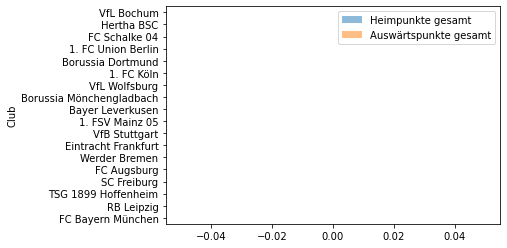

In [375]:
tabellen_dict[1].set_index(keys = "Club")[["Heimpunkte gesamt", "Auswärtspunkte gesamt"]].plot.barh(stacked=True, alpha = 0.5)

In [383]:
test = tabellen_dict[1].set_index(keys = "Club")
test.head()

,Spieltag,Punkte gesamt,Tore gesamt,Gegentore gesamt,Tordifferenz,Heimpunkte gesamt,Auswärtspunkte gesamt
Club,,,,,,,
FC Bayern München,1,3,6,1,5,0,0
RB Leipzig,1,1,1,1,0,0,0
TSG 1899 Hoffenheim,1,0,1,3,-2,0,0
SC Freiburg,1,3,4,0,4,0,0
FC Augsburg,1,0,0,4,-4,0,0


<AxesSubplot:ylabel='Club'>

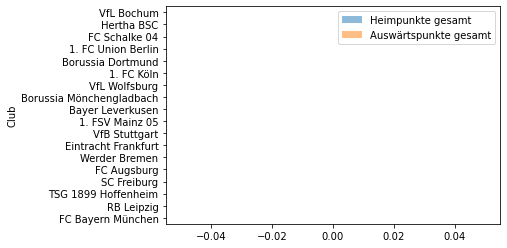

In [381]:
test[["Heimpunkte gesamt", "Auswärtspunkte gesamt"]].plot.barh(stacked=True, alpha = 0.5)

In [382]:
test[["Heimpunkte gesamt", "Auswärtspunkte gesamt"]]

,Heimpunkte gesamt,Auswärtspunkte gesamt
Club,,
FC Bayern München,0,0
RB Leipzig,0,0
TSG 1899 Hoffenheim,0,0
SC Freiburg,0,0
FC Augsburg,0,0
Werder Bremen,0,0
Eintracht Frankfurt,0,0
VfB Stuttgart,0,0
1. FSV Mainz 05,0,0
